In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
cem_df= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/concrete.csv")

In [3]:
cem_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
cem_df.shape

(1030, 9)

In [5]:
cem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
cem_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
cem_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [16]:
duplicate = cem_df.duplicated()
duplicate.sum()

25

In [17]:
cem_df.drop_duplicates(inplace=True)

In [18]:
cem_df.shape

(1005, 9)

<AxesSubplot:>

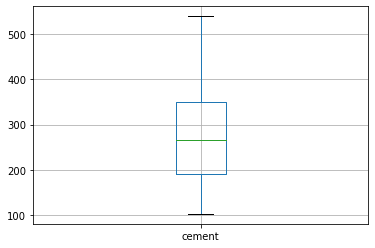

In [19]:
cem_df.boxplot(column="cement")

<AxesSubplot:>

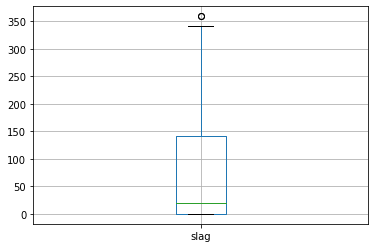

In [20]:
cem_df.boxplot(column="slag")

<AxesSubplot:>

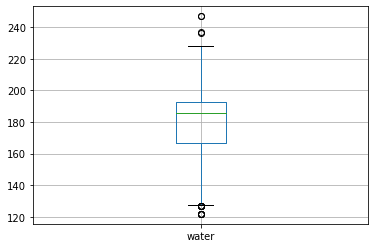

In [21]:
cem_df.boxplot(column="water")

<AxesSubplot:>

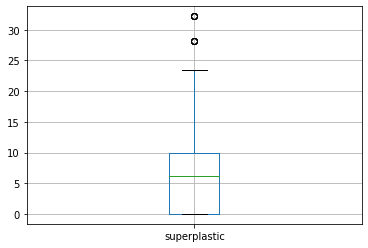

In [22]:
cem_df.boxplot(column="superplastic")

<AxesSubplot:>

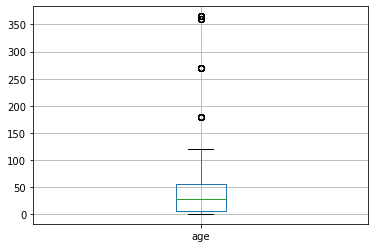

In [23]:
cem_df.boxplot(column="age")

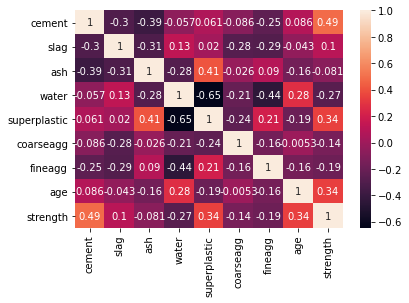

In [24]:
cor=cem_df.corr()
sns.heatmap(cor,annot=True);

In [26]:
median1= cem_df["slag"].median()
median1

20.0

In [27]:
cem_df["slag"].replace("0",median1,inplace=True)

In [72]:
mean1 =cem_df["ash"].mean() ## calculating the median
mean1

55.53631840796018

In [73]:
cem_df["age"].replace("0",median1,inplace=True)

In [74]:
median3 =cem_df["superplastic"].median() ## calculating the median
median3

6.1

In [75]:
cem_df["superplastic"].replace("0",median3,inplace=True)
cem_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [76]:
cem_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [77]:
X = cem_df.drop(['strength'], axis = 1)

#the dependent variable
Y = cem_df['strength']

In [78]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### Model_1: Linear Regression

In [79]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [80]:
model_1.score(X_train, Y_train)

0.6217217238825692

In [81]:
model_1.score(X_test, Y_test)

0.5419610271323057

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [83]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train1, Y_train)


print(poly_clf.score(X_train1, Y_train))

0.7594975479928061


In [84]:
print(poly_clf.score(X_test1, Y_test))

0.689671979801322


#### Model_2: Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [87]:
model_2.score(X_train, Y_train) 

0.9959463679857884

In [88]:
model_2.score(X_test, Y_test)

0.7734277241757174

#### Model_3: KNN Regressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
model_3 = KNeighborsRegressor(n_neighbors = 21)
model_3.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=21)

In [91]:
model_3.score(X_train,Y_train)

0.6198995054477321

In [92]:
model_3.score(X_test,Y_test)

0.4793755769650144

#### Model_4: Support Vector Regressor

In [93]:
from sklearn.svm import SVR

In [94]:
model_4 = SVR(kernel = 'linear', C=2.0)
model_4.fit(X_train,Y_train)

SVR(C=2.0, kernel='linear')

In [95]:
model_4.score(X_train,Y_train)

0.5953262435571971

In [96]:
model_4.score(X_test,Y_test)

0.5224972727718176

   #### Model_5: Bagging Regressor

In [97]:
from sklearn.ensemble import BaggingRegressor

In [98]:
model_5 = BaggingRegressor(n_estimators = 10, base_estimator = model_2)
model_5.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [99]:
model_5.score(X_train,Y_train)

0.9739209275991765

In [100]:
model_5.score(X_test,Y_test)

0.8743310371671544

#### Model_6: AdaBoost Regressor

In [101]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
model_6 = AdaBoostRegressor(n_estimators = 50, learning_rate = 1.0)
model_6.fit(X_train,Y_train)

AdaBoostRegressor()

In [103]:
model_6.score(X_train,Y_train)

0.8132417888335222

In [104]:
model_6.score(X_test,Y_test)

0.7440418489340079

#### Model_7:Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
model_7 = GradientBoostingRegressor(n_estimators = 33)
model_7.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=33)

In [107]:
model_7.score(X_train,Y_train)

0.873692418073535

In [108]:
model_7.score(X_test,Y_test)

0.8195110740662024

#### Model_8: Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
model_8 = RandomForestRegressor(n_estimators=100, max_depth = 4)
model_8.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4)

In [111]:
model_8.score(X_train,Y_train)

0.8203100662641695

In [112]:
model_8.score(X_test,Y_test)

0.7354723787063294

In [113]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#model_9 = GaussianNB(var_smoothing=1e-10)
#model_9.fit(X_train,Y_train)